In [1]:
cd Desktop

C:\Users\hp\Desktop


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp
import matplotlib.cm as cm

In [3]:
dfchurn = pd.read_csv("churn.csv")

In [5]:
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
dfchurn["Int'l Plan"] = dfchurn["Int'l Plan"]== 'yes'
dfchurn["VMail Plan"] = dfchurn["VMail Plan"]== 'yes'

In [8]:
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
colswewant_cont=[ u'Account Length', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls']
colswewant_cat=[u"Int'l Plan", u'VMail Plan']

In [10]:
print(colswewant_cont)
print(colswewant_cat)

['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']
["Int'l Plan", 'VMail Plan']


In [12]:
ychurn = np.where(dfchurn['Churn?']=='True.',1,0)

In [13]:
# let's say the cost are as under-written
admin_cost = 3
offer_cost = 100
clv = 1000 
#customer lifetime value 

In [14]:
# cost-confusion matrix element according to various costs 
conv = 0.5 #fraction that except offer
tnc = 0.
fpc = admin_cost + offer_cost
fnc = clv
tpc = conv*offer_cost + (1. - conv)*(clv+admin_cost)

In [15]:
cost = np.array([[tnc,fpc],[fnc,tpc]])
print (cost)

[[   0.   103. ]
 [1000.   551.5]]


In [16]:
# function for avg cost per person 
from sklearn.metrics import confusion_matrix
def avg_cost(y,ypred, cost):
    c = confusion_matrix(y, ypred)
    score = np.sum(cost*c)/np.sum(c)
    return score 

In [67]:
from sklearn.model_selection import train_test_split
churntrain, churntest = train_test_split(range(dfchurn.shape[0]),train_size= 0.6)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [71]:
testchurner = dfchurn['Churn?'][churntest].values =='True.'
print(testchurner.size)


1334


In [144]:
Xtrain=X.iloc[churntrain]
Xtest =y[churntrain]
ytrain = X.iloc[churntest]
ytest = y[churntest]

In [76]:
pred = np.zeros(testchurner.size, dtype = 'int')
print(pred)
print(confusion_matrix(testchurner,pred))
print(avg_cost(testchurner,pred,cost))

[0 0 0 ... 0 0 0]
[[1137    0]
 [ 197    0]]
147.67616191904048


In [77]:
pred1 = np.ones(testchurner.size, dtype = 'int')
print(pred1)
print(confusion_matrix(testchurner,pred))
print(avg_cost(testchurner,pred1,cost))

[1 1 1 ... 1 1 1]
[[1137    0]
 [ 197    0]]
169.23275862068965


In [117]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()

In [147]:
Xtrain=X.iloc[churntrain]
ytrain = y[churntrain]
Xtest = X.iloc[churntest]
ytest = y[churntest]

In [148]:
clf = clfgnb.fit(Xtrain,ytrain)

In [151]:
training_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
print(training_accuracy)
print(test_accuracy)

0.8664332166083042
0.8650674662668666


In [152]:
confusionmatrix1 = confusion_matrix(ytest, clf.predict(Xtest))

array([[1042,   95],
       [  85,  112]], dtype=int64)

In [154]:
avergae_cost(ytest, clf.predict(Xtest),cost)

117.35607196401799

In [155]:
def repredict(est,t,xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred =(p1 >=t)*1
    return ypred






In [190]:
avg_cost(ytest, repredict(clf, 0.3, Xtest),cost)


110.54010494752623

In [194]:
from sklearn.metrics import roc_curve,auc

In [208]:
fpr,tpr,thresholds = roc_curve(ytest,clf.predict_proba(Xtest)[:,1])


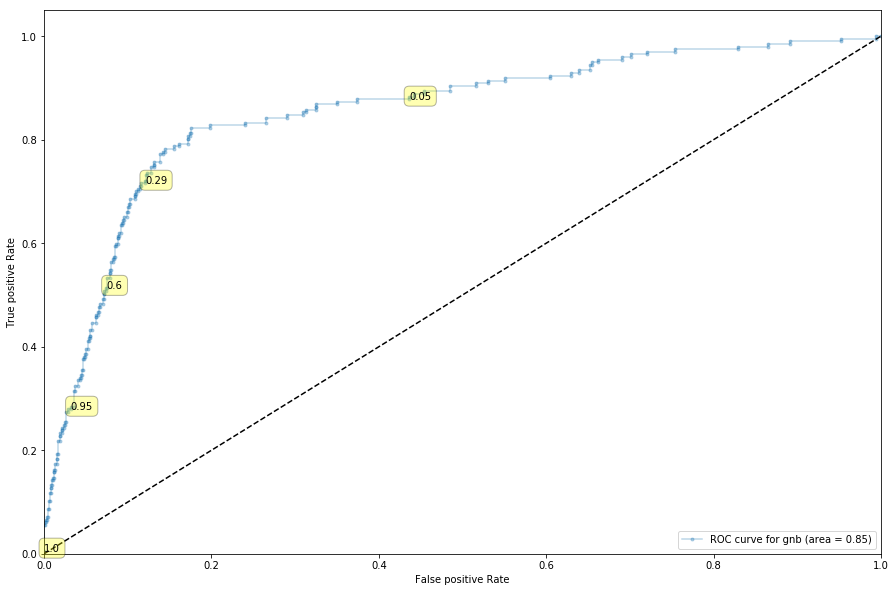

In [296]:
ax = plt.gca()
'gnb'
roc_auc = auc(fpr, tpr)    
ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % ('gnb', roc_auc))     
label_kwargs = {}
label_kwargs['bbox'] = dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3)

for k in range(0,fpr.shape[0],50):
    threshold = np.round(thresholds[k],2)
    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)


ax.plot([0,1],[0,1], 'k--')
ax.set_xlim([0.0,1.0])
ax.set_ylim(0.0,1.05)
ax.set_xlabel('False positive Rate')
ax.set_ylabel('True positive Rate')
ax.legend(loc="lower right")


    

In [254]:
from sklearn.tree import DecisionTreeClassifier
u= dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)
print(u)

{'Xtrain':       Account Length  VMail Message  Day Mins  Day Calls  Day Charge  \
3218             104             18     182.1         66       30.96   
2571             103              0     190.9         62       32.45   
2485              79             17     236.7         95       40.24   
3055             149              0     175.4         80       29.82   
1274             111              0     176.4         62       29.99   
3162              81              0     129.9        121       22.08   
2836             112              0     101.1        119       17.19   
1641              54              0     214.1         77       36.40   
188              164              0     160.6        111       27.30   
1993              86              0     216.3         96       36.77   
1944             131             30     174.0        118       29.58   
303              158              0     158.0        106       26.86   
3058             112              0     189.4        

In [292]:
clfdt = DecisionTreeClassifier( max_depth = 8) 
                               
clf1 = clfdt.fit(Xtrain,ytrain)

In [293]:
training_accuracy1 = clf1.score(Xtrain, ytrain)
test_accuracy1 = clf1.score(Xtest, ytest)
print(training_accuracy1)
print(test_accuracy1)

0.9729864932466233
0.9302848575712144


In [295]:
confusionmatrix2 = confusion_matrix(ytest, clf1.predict(Xtest)
print(confusionmatrix2)


[[1105   32]
 [  61  136]]


In [346]:
for t in np.arange(0,1,0.1):
    print(avg_cost(ytest, repredict(clf1,t, Xtest),cost))

    


169.23275862068965
100.9512743628186
103.54122938530735
104.05922038980509
104.05922038980509
104.05922038980509
104.42278860569715
104.42278860569715
104.42278860569715
104.42278860569715


In [329]:
fpr1,tpr1,thresholds1 = roc_curve(ytest,clf1.predict_proba(Xtest)[:,1])

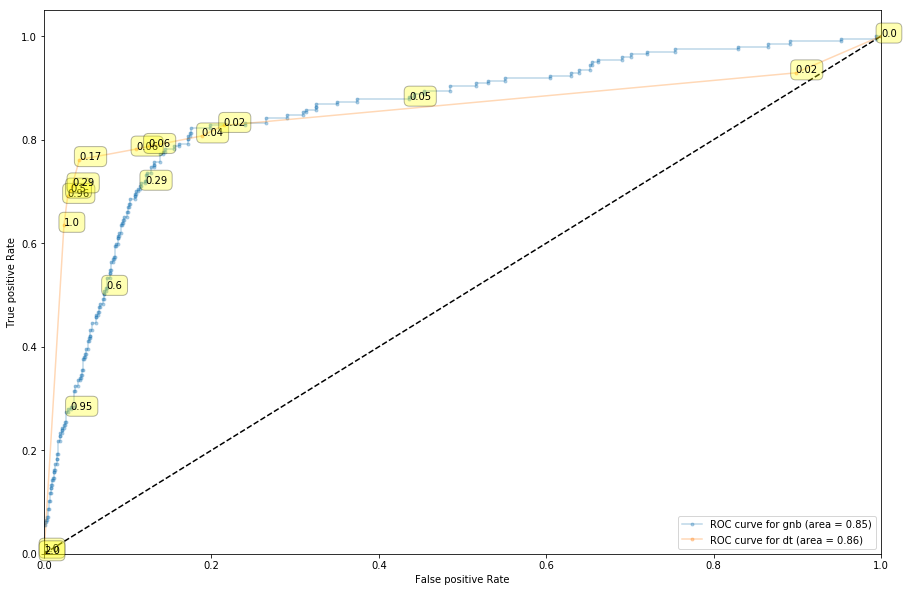

In [307]:
ax = plt.gca()

roc_auc = auc(fpr, tpr)    
ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % ('gnb', roc_auc))     
label_kwargs = {}
label_kwargs['bbox'] = dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3)

for k in range(0,fpr.shape[0],50):
    threshold = np.round(thresholds[k],2)
    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)


ax.plot([0,1],[0,1], 'k--')
ax.set_xlim([0.0,1.0])
ax.set_ylim(0.0,1.05)
ax.set_xlabel('False positive Rate')
ax.set_ylabel('True positive Rate')
ax.legend(loc="lower right")

ax1 = plt.gca()
roc_auc1 = auc(fpr1, tpr1)    
ax1.plot(fpr1, tpr1, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % ('dt', roc_auc1))     
label_kwargs = {}
label_kwargs['bbox'] = dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3)

for p in range(0,fpr1.shape[0],1):
    threshold1 = np.round(thresholds1[p],2)
    ax.annotate(threshold1, (fpr1[p], tpr1[p]), **label_kwargs)
ax1.legend(loc="lower right")

In [308]:
print(cost)

[[   0.   103. ]
 [1000.   551.5]]


In [310]:
def rat(cost):
    return ((cost[0,1]-cost[0,0])/(cost[1,0]-cost[1,1]))

In [311]:
def c_repredict(est,c,xtest):
    r = rat(c)
    print(r)
    t = r/1.+r
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1>=t)*1
    return ypred

In [312]:
avg_cost(ytest, c_repredict(clf1, cost, Xtest), cost)


0.22965440356744704


104.05922038980509

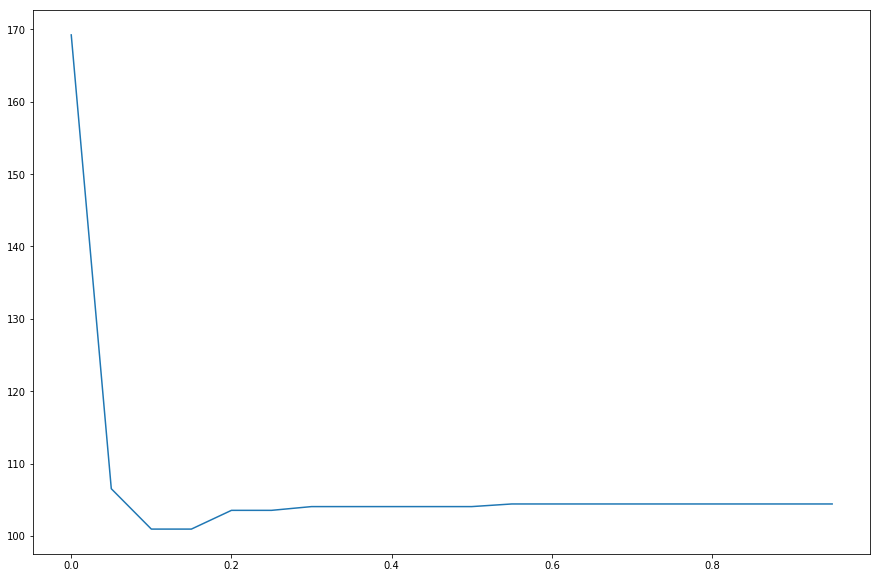

In [324]:

plt.plot(np.arange(0,1,0.05), [avg_cost(ytest, repredict(clf1, t, Xtest), cost) for t in np.arange(0,1,0.05)] )

In [186]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

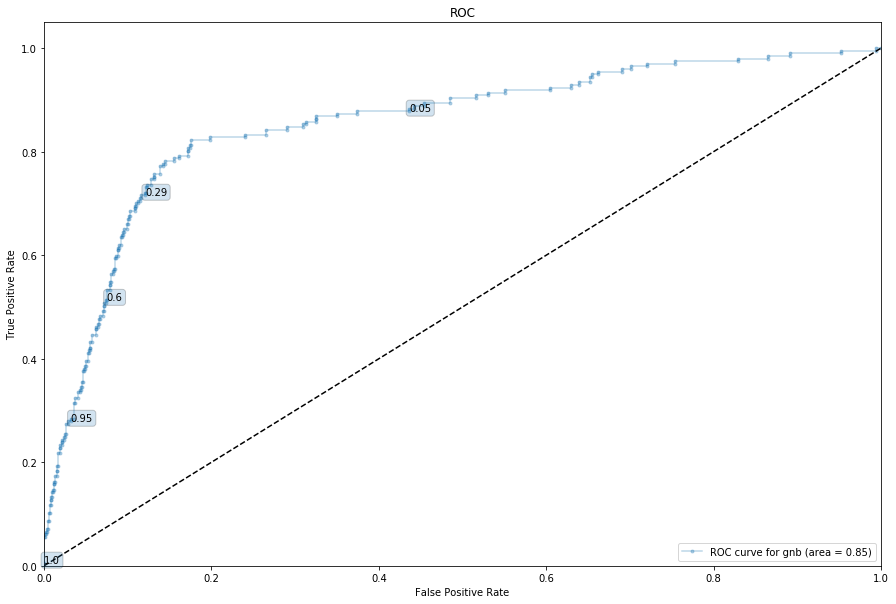

In [188]:
make_roc("gnb",clfgnb, ytest, Xtest, None, labe=50)


In [165]:
from  sklearn.metrics import roc_curve, auc

In [207]:
r= clf.predict_proba(Xtest)[:,1]
print(r)
name = "gnb"
ax =plt.gca()
plt.rcParams["figure.figsize"] = (15,10)
fpr,tpr, thresholds = roc_curve(ytest, clf.predict_proba(Xtest)[:,1])
roc_auc =auc(fpr,tpr)
ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))

l=fpr.shape[0]
ax.plot(fpr[0:l:2], tpr[0:l:2], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))label_kwargs = {}
 label_kwargs = {}
label_kwargs['bbox'] = dict( boxstyle='round,pad=0.3', alpha=0.2)
for k in range(0, fpr.shape[0],5):
    #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
    threshold = str(np.round(thresholds[k], 2))
    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.legend(loc="lower right")

SyntaxError: invalid syntax (<ipython-input-207-04a004193c8e>, line 11)

[0.02694962 0.61051021 0.00286824 ... 0.0132692  0.20916689 0.04000795]


ValueError: slice step cannot be zero

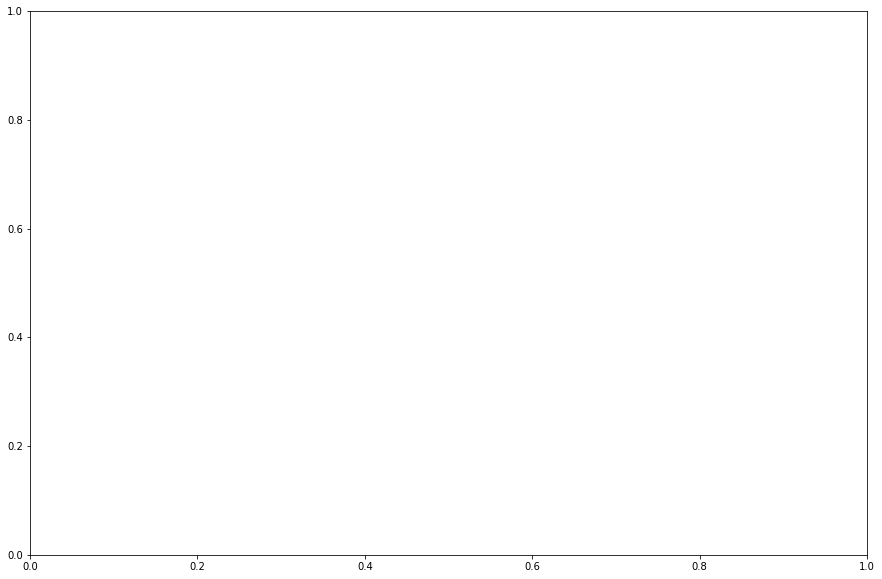

In [205]:
r= clf.predict_proba(Xtest)[:,1]
print(r)
name = "gnb"
ax =plt.gca()

fpr,tpr, thresholds = roc_curve(ytest, clf.predict_proba(Xtest)[:,1])
roc_auc =auc(fpr,tpr)

l=fpr.shape[0]
ax.plot(fpr[0:l:0], tpr[0:l:0], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
label_kwargs = {}
label_kwargs['bbox'] = dict( boxstyle='round,pad=0.3', alpha=0.2)
for k in range(0, fpr.shape[0],5):
    #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
    threshold = str(np.round(thresholds[k], 2))
    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.legend(loc="lower right")

In [49]:
# what will be the cost if we assume no customer churns, lets see-
from sklearn.model_selection import train_test_split
churntrain, churntest = train_test_split(range(dfchurn.shape[0]), train_size=0.6)


churnmask=np.ones(dfchurn.shape[0], dtype='int')

churnmask[churntrain]=1
churnmask[churntest]=0
print(churnmask)
churnmask = (churnmask==1)
print(churnmask.size)
print(~churnmask.size)


[1 1 1 ... 1 1 1]
3333
-3334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
dfchurn['Churn?']

0       False.
1       False.
2       False.
3       False.
4       False.
5       False.
6       False.
7       False.
8       False.
9       False.
10       True.
11      False.
12      False.
13      False.
14      False.
15       True.
16      False.
17      False.
18      False.
19      False.
20      False.
21       True.
22      False.
23      False.
24      False.
25      False.
26      False.
27      False.
28      False.
29      False.
         ...  
3303    False.
3304     True.
3305    False.
3306    False.
3307    False.
3308    False.
3309    False.
3310    False.
3311    False.
3312    False.
3313    False.
3314    False.
3315    False.
3316    False.
3317    False.
3318    False.
3319    False.
3320     True.
3321    False.
3322     True.
3323     True.
3324    False.
3325    False.
3326    False.
3327    False.
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object

In [58]:
dfchurn['Churn?'][~churnmask]

1334

In [64]:
testchurners=dfchurn['Churn?'][churntest].values=='True.'
print(testchurners.size)

1334


In [62]:
print(dfchurn['Churn?'][churntest])
print(dfchurn['Churn?'][churntest].values =='True')

1261    False.
327     False.
3148     True.
52      False.
1580    False.
852     False.
580      True.
114     False.
559     False.
1656    False.
369     False.
1030     True.
1138    False.
2492    False.
1143    False.
512     False.
2686    False.
843     False.
1074    False.
2724     True.
3255     True.
1485    False.
1572    False.
3022    False.
2171    False.
86       True.
1326    False.
180     False.
3118    False.
1971    False.
         ...  
788     False.
2762    False.
1618    False.
103     False.
755     False.
548     False.
76       True.
1824    False.
264     False.
1702     True.
1836    False.
1597    False.
1691     True.
2864    False.
848     False.
1454     True.
2588    False.
2918    False.
279     False.
605      True.
43      False.
1842     True.
978      True.
1004    False.
2907    False.
471     False.
2172    False.
2009    False.
2693    False.
1091    False.
Name: Churn?, Length: 1334, dtype: object
[False False False ... False False False]


In [66]:
testsize = dfchurn[~churnmask].shape[0]
print(testsize)
ypred_dste = np.zeros(testsize, dtype="int")
print(ypred_dste)
print(testchurners)
print (confusion_matrix(testchurners, ypred_dste))

1334
[0 0 0 ... 0 0 0]
[False False  True ... False False False]
[[1147    0]
 [ 187    0]]
